The dataset consists of marks of two exams for 100 students.The target value takes on binary vlaues 1,0.1 means the applicant was admitted into the university whereas 0 means the applicant didn't get an admission.The objective is to build a classifier that can predict whether a student will be admitted into university or not.

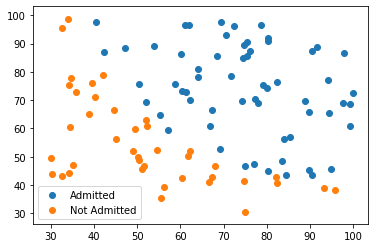

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

def load_data(path,header):
    marks_df = pd.read_csv(path,header = None)
    return marks_df

if __name__ == "__main__":
    #load the data from the text file
    data = load_data("data.txt",None)
    
    #X - feature values,all the columns except the last column
    X = data.iloc[:,:-1]
    
    #y - target values last column of the data
    y = data.iloc[:,-1]
    data.head()
    #filter the applicants who got admitted
    admitted  = data.loc[y == 1]
    
    #filter out the applicants who didn't get admission
    not_admitted = data.loc[y == 0]
    
    #plots
    plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],label = "Admitted")
    plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],label = "Not Admitted")
    plt.legend(loc = 'best')
    plt.show()

In [5]:
model = LogisticRegression()
model.fit(X,y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
conf_matrix = confusion_matrix(y,predicted_classes)
print(accuracy)
print(conf_matrix)
print(model.predict([[61,86]]))

C:\Users\kvsw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.87
[[27 13]
 [ 0 60]]
[1]


In [6]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


multiclass :{'ovr','multinomial','auto'} multinomial -->Softmax 

solver :{'lbfgs','liblinear','sag','saga','newton-cg'} 
         small datasets :"liblinear" whereas 'sag' and 'saga' are faster for larger datasets
         for multiclass problems,only 'newton-cg','sag','saga'and 'lbfgs' handle multinomial loss
         
C :float default(1.0) inverse of regularization (alpha in LinearR)

max_iter ->int (default = 100) maximum number of iterations taken for the solvers to converge

In [9]:
model = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs')
model.fit(X,y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
conf_matrix = confusion_matrix(y,predicted_classes)
print(accuracy)
print(conf_matrix)
print(model.predict([[60,86]]))

0.89
[[34  6]
 [ 5 55]]
[1]


Multiple categories in data we can choose Multinomial Logistic Regression(Softmax Regression).

In [10]:
#another process

In [13]:
import pandas as pd
df=pd.read_csv("data.txt")
df.tail()

,34.62365962451697,78.0246928153624,0
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1
98,74.775893,89.529813,1


In [14]:
df.columns

Index(['34.62365962451697', '78.0246928153624', '0'], dtype='object')

In [15]:
df.columns=[0,1,2]
df.head()

,0,1,2
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [18]:
#x,y
x=df.drop(2,axis=1)
#x
y=df[2]
#y

In [24]:
admit=df[y==1]
admit

,0,1,2
2,60.182599,86.308552,1
3,79.032736,75.344376,1
5,61.106665,96.511426,1
6,75.024746,46.554014,1
7,76.098787,87.420570,1
8,84.432820,43.533393,1
11,82.307053,76.481963,1
12,69.364589,97.718692,1
14,53.971052,89.207350,1
15,69.070144,52.740470,1


In [25]:
notadmit=df[y==0]
notadmit

,0,1,2
0,30.286711,43.894998,0
1,35.847409,72.902198,0
4,45.083277,56.316372,0
9,95.861555,38.225278,0
10,75.013658,30.603263,0
13,39.538339,76.036811,0
16,67.946855,46.678574,0
19,67.372028,42.838438,0
21,50.534788,48.855812,0
22,34.212061,44.209529,0


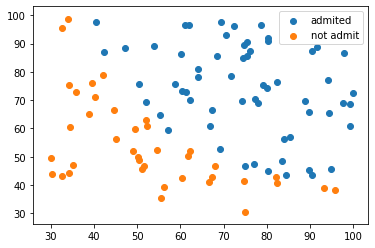

In [29]:
import matplotlib.pyplot as plt
plt.scatter(admit.iloc[:,0],admit.iloc[:,1],label="admited")
plt.scatter(notadmit.iloc[:,0],notadmit.iloc[:,1],label="not admit")
plt.legend()
plt.show()